# **Penny drop with Air Resistance**

In [1]:
# set up libraries

# modsim.py setup
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' + 'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [2]:
# import all required functions
from modsim import *
from numpy import pi

In [3]:
# first calculate gravity on Arrakis
earth_grav = 9.81
arrak_grav = earth_grav*0.38
print('Gravity on Arrakis is = %.2f' % arrak_grav,'m/s\u00b2') 

Gravity on Arrakis is = 3.73 m/s²


In [4]:
# Set parameters for calculation
# Take user input for mass and density. Diameter is fixed at 20cm (0.2m)
params = Params(
    mass = float(input('Enter mass of penny (kg): ')),
    rho = float(input('Enter density of penny (kg/m\u00b3): ')),
    g = arrak_grav,
    diam = 0.2,
    v_init = 0,       # initial velocity  (m/s)
    v_term = 40,      # terminal velocity (m/s)
    h = 58-3,         # drop height minus enemy height (m)
    t_end = 100,
)

Enter mass of penny (kg): 10
Enter density of penny (kg/m³): 1.5


In [5]:
# Define method to carry out calculations
def make_system(params):
    init = State(y=params.h, v=params.v_init)

    #calculate area
    area = pi * (params.diam/2)**2

    #calculate coefficient of drag
    cD = (2 * params.mass * params.g / (params.rho * area * params.v_term**2))

    return System(init=init,
                  area=area,
                  cD=cD,
                  mass=params.mass,
                  rho=params.rho,
                  g=params.g,
                  t_end=params.t_end)

In [6]:
# create new object with parameters  
system = make_system(params)
show(system)

,value
init,"y 55 v 0 Name: state, dtype: int64"
area,0.0314159
cD,0.98883
mass,10
rho,1.5
g,3.7278
t_end,100


In [7]:
# simulation code
def slope_func(t, state, system):
    y, v = state
    rho, cD, area = system.rho, system.cD, system.area
    mass, g = system.mass, system.g
    
    # calculate change in acceleration (aD) and force (fD) due to drag
    fD = rho * v**2 * cD * area / 2 
    aD = fD / mass

    dydt = v
    dvdt = -g + aD    
    return dydt, dvdt
#########################################



###########################################
# event function to stop simulation when height = 0
def event_func(t, state, system):
    y, v = state
    return y

# run simulation
results, details = run_solve_ivp(system, slope_func, events=event_func)
y, v = results.iloc[-1]

results.tail()


,y,v
5.327491,4.145712e+00,-18.369968
5.382986,3.122692e+00,-18.532838
5.438480,2.090706e+00,-18.694941
5.493975,1.049795e+00,-18.856275
5.549470,1.421085e-14,-19.016836


Penny hits the enemy at 5.55 seconds


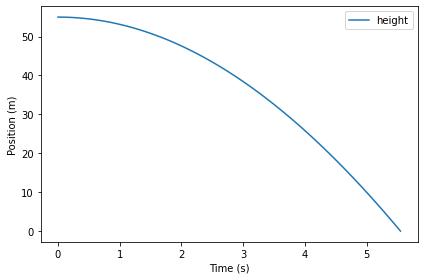

In [8]:
# plot graph for Time vs Position
def plot_position(results):
    results.y.plot(label='height')        
    decorate(xlabel='Time (s)', ylabel='Position (m)')
    
plot_position(results)
print('Penny hits the enemy at %.2f' % results.index[-1],'seconds')

The final velocity is 19.02 m/s downwards


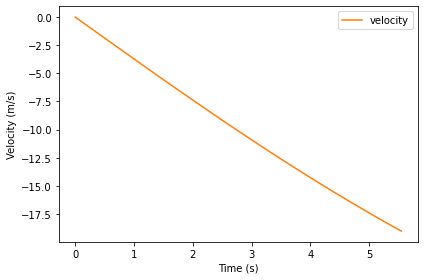

In [9]:
# plot graph for Time vs Velocity
def plot_velocity(results):
    results.v.plot(color='C1', label='velocity')        
    decorate(xlabel='Time (s)', ylabel='Velocity (m/s)')
    
plot_velocity(results)
print('The final velocity is %.2f' % abs(v),'m/s downwards')

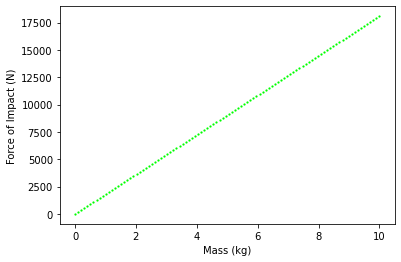

In [60]:
# To calculate mass vs force-of-impact graph, we calculate a 
# graph to show force-of-impact created by a coin ranging 
# from a mass of zero (0) to ten (10) kilograms. 
from matplotlib import pyplot as plt

#numpy linespace method to create a range of 0-10 for mass range
c_mass = np.linspace(0.0, 10.0, num=100)

# calcule kinetic energy
KE = 0.5 * c_mass * abs(v)**2

# calculate force (kinetic energy/collision_time)
force = KE/0.1

# plot scatter graph for Mass vs Force-of-Impact
plt.xlabel('Mass (kg)')
plt.ylabel('Force of Impact (N)')
for i in range(len(c_mass)):
  plt.scatter(c_mass[i], force[i], c='lime', s=5, linewidth=0)

The minimum mass required to crack enemy skull is 5.45 N


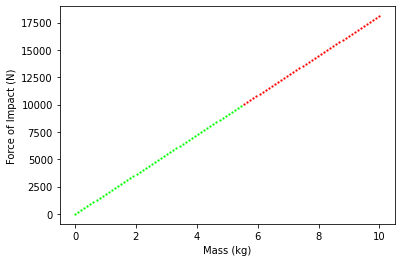

In [61]:
# Mass v force-of-impact graph that shows cut-off for
# when mass of penny exceeds a force-of-impact of 10,000N

#calculate force as above
c_mass = np.linspace(0.0, 10.0, num=100)
KE = 0.5 * c_mass * abs(v)**2
force = KE/0.1

# create a color index for all values to allow the color
# to be changed once the value of force[i] exceeds 10,000
color = []
for i in range(0, len(force)):
  color.append('lime')

for i in range(0, len(force)):
  if force[i]>999 and force[i]<10001:
    x=c_mass[i]  # finding minimum mass needed to exceed 10,000N
  elif force[i]>10000:
    color[i]='red'

print('The minimum mass required to crack enemy skull is %.2f' % x,'N')

# plot scatter graph for Mass vs Force-of-Impact
plt.xlabel('Mass (kg)')
plt.ylabel('Force of Impact (N)')
for i in range(len(c_mass)):
  plt.scatter(c_mass[i], force[i], c=color[i], s=5, linewidth=0)